In [135]:
# does not make an error when I try to do something chained, it makes code faster 
pd.options.mode.chained_assignment = None 
# this data set has heaps of columns, I need to see more results when I open or operate something
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)

plt.rcParams['figure.figsize'] = [12.0, 8.0]

In [136]:
# Custom Modules 
import utils.data_display as dd
import utils.preprocessor as pp
import utils.statsmodels_helper as smh
import utils.var_inflation_factor as vif
import utils.feature_selection as fs
import utils.str_helper as sh

In [154]:
df_train = pd.read_csv('data/train.csv')
df_macro = pd.read_csv('data/macro.csv')
df_test = pd.read_csv('data/test.csv')
# df_samplesubmission = pd.read_csv('../data/samplesubmission.csv')

In [138]:
df_train.describe()

id       full_sq       life_sq         floor     max_floor  \
count  21570.000000  21570.000000  17031.000000  21446.000000  14797.000000   
mean   15249.022995     54.266342     34.024485      7.647114     12.541326   
std     8781.672034     42.236384     20.974445      5.307672      6.786803   
min        2.000000      0.000000      0.000000      0.000000      0.000000   
25%     7649.250000     38.000000     20.000000      3.000000      9.000000   
50%    15239.500000     49.000000     30.000000      6.000000     12.000000   
75%    22834.750000     63.000000     43.000000     11.000000     17.000000   
max    30473.000000   5326.000000    802.000000     44.000000    117.000000   

           material    build_year      num_room      kitch_sq         state  \
count  14797.000000  1.194900e+04  14797.000000  14797.000000  11970.000000   
mean       1.830709  3.558447e+03      1.909982      6.567142      2.111028   
std        1.482367  1.834225e+05      0.860274     33.430237      0.893036   
min        1.000000  0.000000e+00      0.000000      0.000000      1.000000   
25%        1.000000  1.966000e+03      1.000000      1.000000      1.000000   
50%        1.000000  1.979000e+03      2.000000      6.000000      2.000000   
75%        2.000000  2.005000e+03      2.000000      9.000000      3.000000   
max        6.000000  2.005201e+07     19.000000   2014.000000     33.000000   

             area_m    raion_popul  green_zone_part   indust_part  \
count  2.157000e+04   21570.000000     21570.000000  21570.000000   
mean   1.760663e+07   83852.933426         0.218141      0.119448   
std    2.062057e+07   57690.121043         0.175241      0.119388   
min    2.081628e+06    2546.000000         0.001879      0.000000   
25%    7.128794e+06   21819.000000         0.063755      0.017647   
50%    1.041657e+07   83502.000000         0.167526      0.072158   
75%    1.803644e+07  122862.000000         0.336177      0.195781   
max    2.060718e+08  247469.000000         0.852923      0.521867   

       children_preschool  preschool_quota  preschool_education_centers_raion  \
count        21570.000000     16850.000000                       21570.000000   
mean          5129.555679      3255.616973                           4.050950   
std           3802.599043      2159.088597                           2.979235   
min            175.000000         0.000000                           0.000000   
25%           1706.000000      1874.000000                           2.000000   
50%           4857.000000      2854.000000                           4.000000   
75%           7103.000000      4050.000000                           6.000000   
max          19223.000000     11926.000000                          13.000000   

       children_school  school_quota  school_education_centers_raion  \
count     21570.000000  16853.000000                    21570.000000   
mean       5345.500371   8297.682252                        4.689754   
std        3975.862965   4269.554465                        3.427787   
min         168.000000   1012.000000                        0.000000   
25%        1564.000000   5782.000000                        2.000000   
50%        5261.000000   7377.000000                        5.000000   
75%        7227.000000   9891.000000                        7.000000   
max       19083.000000  24750.000000                       14.000000   

       school_education_centers_top_20_raion  hospital_beds_raion  \
count                           21570.000000         11327.000000   
mean                                0.111405          1186.483623   
std                                 0.336017          1053.818793   
min                                 0.000000             0.000000   
25%                                 0.000000           520.000000   
50%                                 0.000000           990.000000   
75%                                 0.000000          1786.000000   
max                                 2.00

In [139]:
dtype = df_train.dtypes.reset_index()
dtype.columns = ['Count', 'column type']
dtype.groupby('column type').aggregate('count').reset_index()

column type  Count
0       int64    157
1     float64    119
2      object     16

In [140]:
dtype = df_macro.dtypes.reset_index()
dtype.columns = ['Count', 'column type']
dtype.groupby('column type').aggregate('count').reset_index()

column type  Count
0       int64      2
1     float64     94
2      object      4

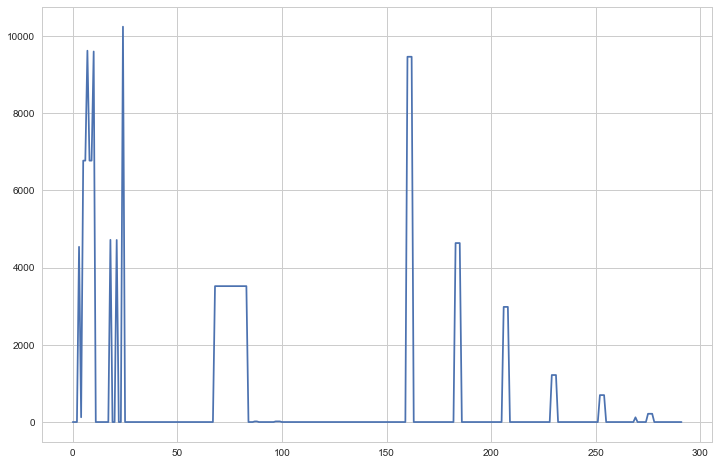

In [141]:
# After cheak the count of each columns, I found that many missing values are in it 
plt.plot(range(len(df_train.columns)), df_train.isnull().sum())

# plt.xlabel([x[:1] for x in df_train.columns])
plt.show()

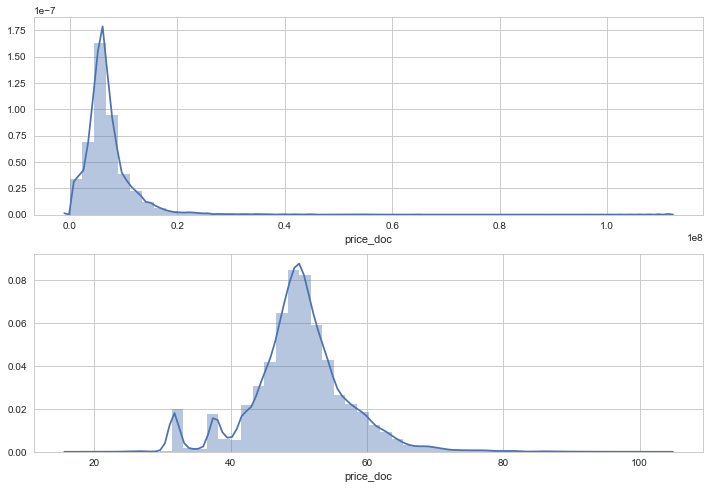

In [142]:
# It is seen following Kai_square distribution, ovbiously
plt.subplot(211)
sns.distplot(df_train.price_doc)

# So I will make it Gaussian Normal Distribution with logarithm later.
plt.subplot(212)
sns.distplot(np.sqrt(np.sqrt(df_train.price_doc)))

plt.show()

In [143]:
df_macro.describe()

oil_urals     gdp_quart  gdp_quart_growth          cpi          ppi  \
count  2484.000000   2394.000000       2394.000000  2453.000000  2453.000000   
mean     86.467157  16993.230075          1.523726   407.808398   480.216347   
std      27.528709   3187.074480          2.875659    65.895969    70.286366   
min      29.112500   9995.800000         -4.500000   315.100000   337.200000   
25%      61.283300  14925.000000          0.400000   354.000000   438.400000   
50%     101.416500  17442.100000          1.300000   393.000000   473.500000   
75%     109.310000  19284.100000          4.100000   469.400000   520.700000   
max     122.520000  22016.100000          5.200000   531.000000   606.100000   

       gdp_deflator  balance_trade  balance_trade_growth       usdrub  \
count   2119.000000    2453.000000           2394.000000  2481.000000   
mean     110.122308      15.344006             16.846742    40.732406   
std       14.818429       3.878104             16.988727    15.006583   
min       86.721000       5.823000             -4.100000    27.276300   
25%      100.000000      12.785000              7.200000    30.508800   
50%      108.299000      16.041000             10.500000    32.316500   
75%      123.661000      18.076000             21.500000    53.752300   
max      133.160000      21.939000             75.800000    82.276400   

            eurrub        brent  net_capital_export    gdp_annual  \
count  2481.000000  2481.000000         2088.000000   2484.000000   
mean     50.444801    88.184103           -0.038874  62557.073470   
std      13.905912    26.960042            0.274391  14503.679563   
min      37.445400    27.880000           -0.523202  38807.200000   
25%      40.242600    63.340000           -0.241395  46308.500000   
50%      42.862200   101.560000           -0.066348  66926.900000   
75%      61.323700   109.990000            0.152726  77945.100000   
max      90.881500   126.650000            0.614395  80804.300000   

       gdp_annual_growth  average_provision_of_build_contract  \
count        2484.000000                          2484.000000   
mean            0.005101                             5.766268   
std             0.042621                             0.536725   
min            -0.078209                             4.000000   
25%            -0.037267                             5.750000   
50%             0.012795                             5.940000   
75%             0.042644                             6.070000   
max             0.045037                             6.460000   

       average_provision_of_build_contract_moscow          rts        micex  \
count                                 2119.000000  2474.000000  2474.000000   
mean                                     6.561406  1314.539830  1553.797336   
std                                      0.450075   334.604876   180.790490   
min                                      5.960000   628.410000  1197.390000   
25%                                      6.180000   988.067500  1416.500000   
50%                                      6.590000  1377.380000  1496.880000   
75%                                      6.750000  1525.905000  1686.287500   
max                                      7.830000  2123.560000  2053.750000   

       micex_rgbi_tr  micex_cbi_tr  deposits_value  deposits_growth  \
count    2474.000000   2483.000000    2.484000e+03      2453.000000   
mean      129.026273    233.729046    1.504170e+07         0.013947   
std         7.101521     35.581966    4.762312e+06         0.018343   
min        97.860000    171.150000    7.484970e+06        -0.020356   
25%       126.130000    205.295000    1.087608e+07         0.001960   
50%       131.280000    233.000000    1.521005e+07         0.014079   
75%       132.970000    248.390000    1.907733e+07         0.022536   
max       141.650000    314.300000    2.345319e+07         0.080400   

       deposits_rate  mortgage_value  mortgage_growth  mortgage_rate  

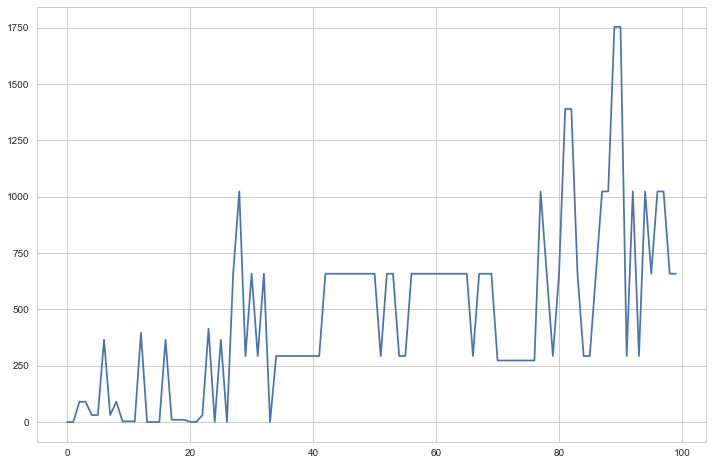

In [144]:
# This have plenty missing values too. 

plt.plot(range(len(df_macro.columns)), df_macro.isnull().sum())

# plt.xlabel([x[:1] for x in df_train.columns])
plt.show()

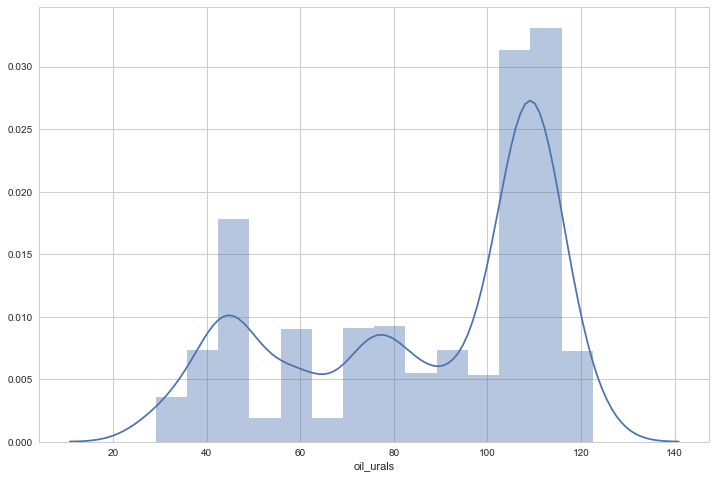

In [145]:
# eg>
sns.distplot(df_macro.oil_urals)

    This data_set includes so many missing values as you look above. Starting the train, considring method for impution is not non_sensible. but in my oppinion, It has something wrong. the reason is below.

    For feature selection, extracting Feature importance from XGboost model or extremetree model could be seen quite proper. but should I impute the missing values before get that? My answer is no. Basically imputed data is just predicted one, not a real data. So I think that I fill the missing values with mean or other abstract values on current stage. 

### XGboost for getting feature importance

In [146]:
import xgboost as xgb
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
import operator

/Users/MAC/.pyenv/versions/anaconda3-4.4.0/envs/python_al/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


###### making Data set to train and getting Feature impotance 

In [147]:
X_train = pd.merge(df_train, df_macro, on='timestamp')
X_train = X_train._get_numeric_data()
X_train.shape

(21570, 372)

In [148]:
y_train = X_train['price_doc']
del X_train['price_doc']

In [149]:
features = X_train.columns

def create_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    i = 0
    for feat in features:
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
        i = i + 1

    outfile.close()

    
create_feature_map(features)

In [150]:
xgb_params = {"objective": "reg:linear", "eta": 0.01, "max_depth": 8, "seed": 42, "silent": 1}
num_rounds = 1000
dtrain = xgb.DMatrix(X_train, label=y_train)
gbdt = xgb.train(xgb_params, dtrain, num_rounds)

importance = gbdt.get_fscore(fmap='xgb.fmap')
importance = sorted(importance.items(), key=operator.itemgetter(1))

df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()

In [ ]:
# The ranked score of 371 columns, 

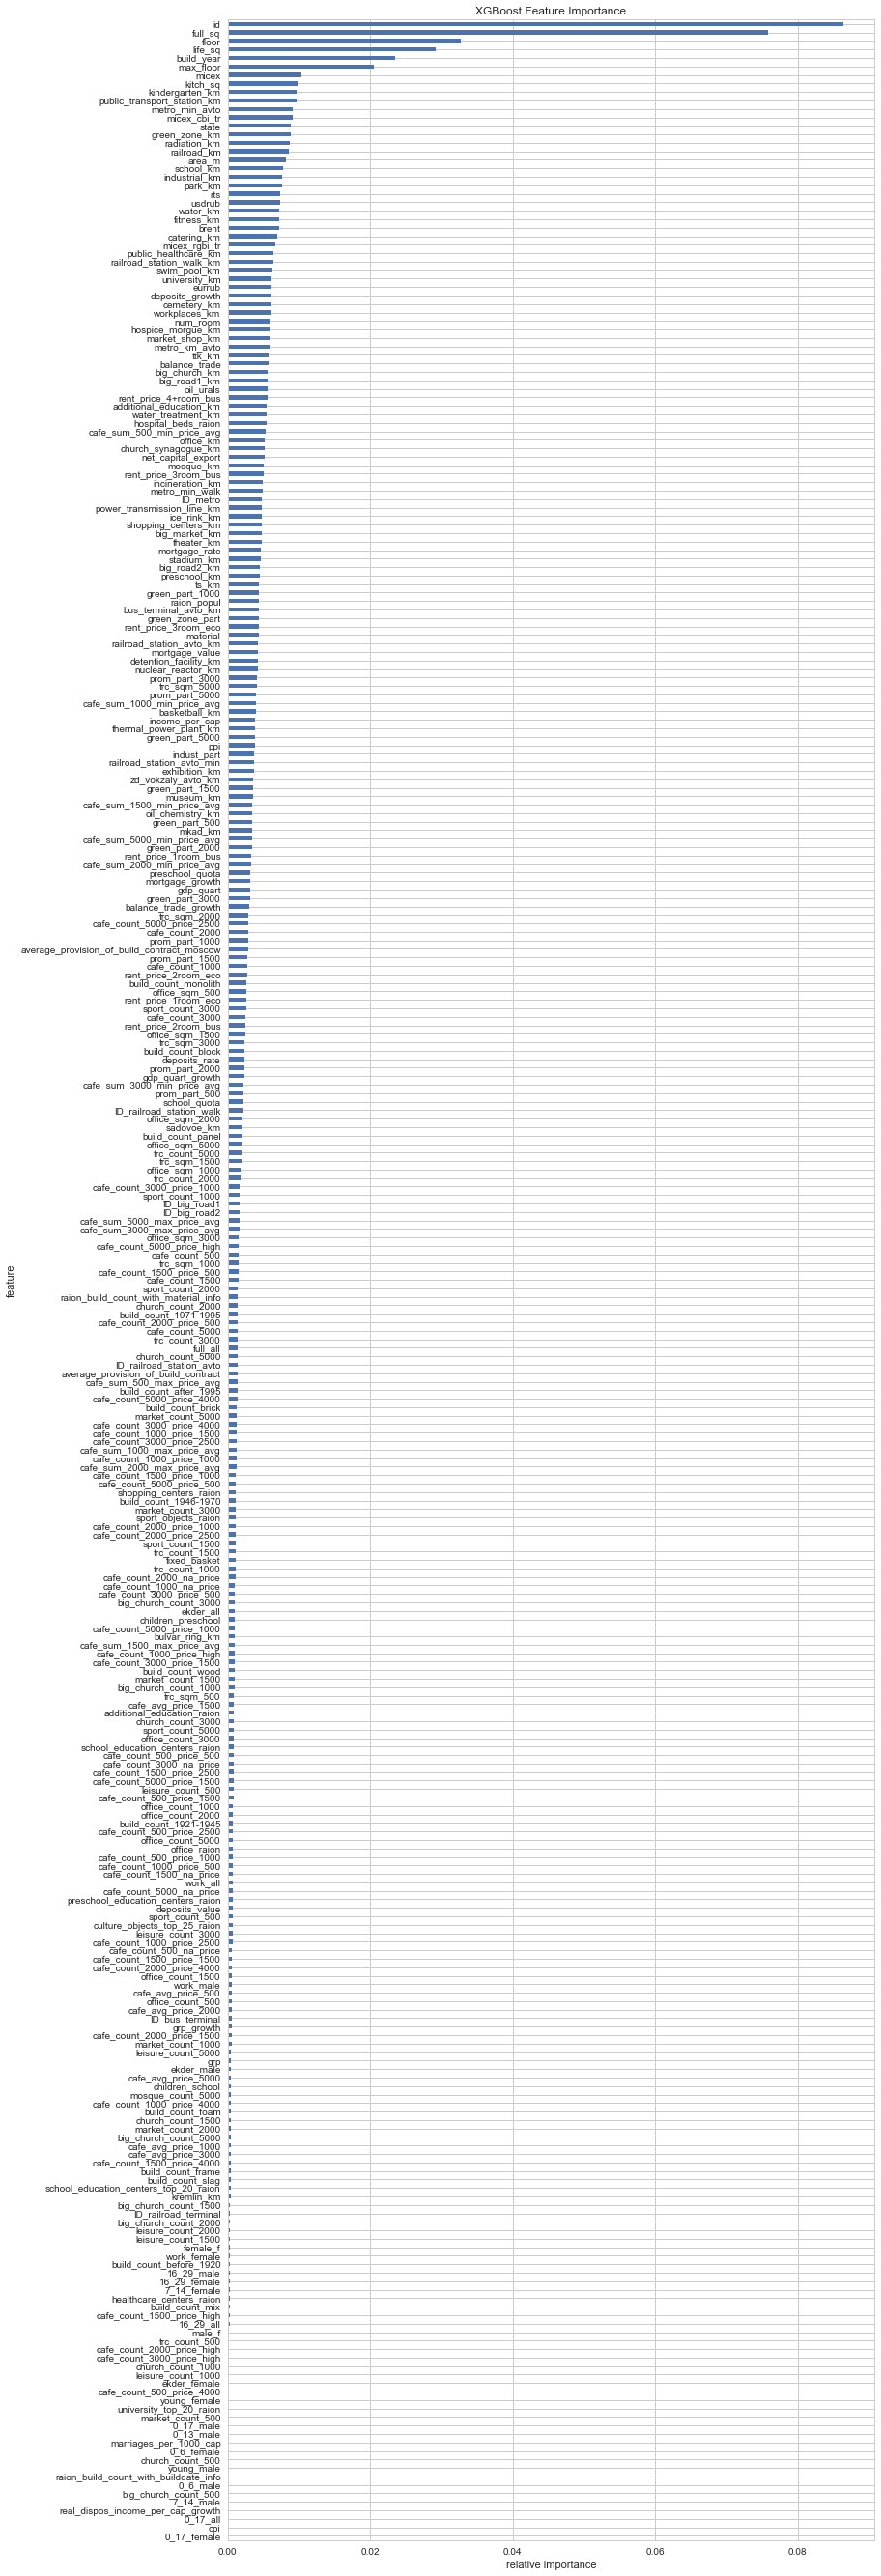

In [163]:
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(12, 48))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')

In [165]:
df_Feature_importance = df
del df

#### Imputation

 - 1st rule : Using correlated other columns, predict the missing values 
 
 - 2nd rule : A few columns have not filled by the prediction. I fill them with expectency such as mean, most frequecy and median, determined by each columns distribution

In [21]:
df_t = pd.read_csv('data/train.csv', index_col=0, parse_dates=['timestamp'])
df_m = pd.read_csv('data/macro.csv', parse_dates=['timestamp'])

df_test = pd.read_csv('data/test.csv', index_col=0, parse_dates=['timestamp'])
# df_test_kaggle = pd.read_csv('data/kaggle/test.csv', parse_dates=['timestamp'])

df_tm = pp.merge(df_t, df_m, 'timestamp')
df_testm = pp.merge(df_test, df_m, 'timestamp')
# df_testm_kaggle = pp.merge(df_test_kaggle, df_m, 'timestamp')

df_tm.shape, df_testm.shape

((21570, 390), (7662, 389))

### 독립변수 이름 수정
##### statsmodels의 from_formula를 사용하려면 숫자로 시작하거나 변수 이름에 +, -, : 같은 득수문자를 제거해줘야한다.

In [22]:
[col for col in df_tm.columns if col[0].isdigit() or '+' in col or '-' in col or ':' in col]

['0_6_all',
 '0_6_male',
 '0_6_female',
 '7_14_all',
 '7_14_male',
 '7_14_female',
 '0_17_all',
 '0_17_male',
 '0_17_female',
 '16_29_all',
 '16_29_male',
 '16_29_female',
 '0_13_all',
 '0_13_male',
 '0_13_female',
 'build_count_1921-1945',
 'build_count_1946-1970',
 'build_count_1971-1995',
 'rent_price_4+room_bus']

##### 숫자로 시작하는 변수이름에 c_를 붙혀주고 +, - 특수문자가 있는 경우 빼주자.

In [23]:
df_tm.columns = pp.clean_column_names(df_tm.columns)
df_testm.columns = pp.clean_column_names(df_testm)
[col for col in df_tm.columns if col[0].isdigit() or '+' in col or '-' in col or ':' in col], \
[col for col in df_testm.columns if col[0].isdigit() or '+' in col or '-' in col or ':' in col]

([], [])

### 독립변수를 1차 청소

##### 숫자데이터이지만 이해 할 수없는 데이터로 저장 되있으면 제거
  * 변수설명을 통해서도 알수 없는 숫자문자열인 경우
  
##### Constant한 독립변수 제거
  * 분산이 0이라서 분석에 도움이 안된다고 판단
  
##### 논리적으로 말이 안되는 데이터는 NA로 처리 
  * 예를들어, 건물 총 층수보다 거래된 집의 층이 더 높게 잡혀 있는 경우

In [24]:
print(df_tm.shape)
df_tm = pp.clean_data(df_tm)
df_tm.shape

(21570, 390)


(21570, 375)

In [25]:
print(df_testm.shape)
df_testm = pp.clean_data(df_testm)
df_testm.shape

(7662, 389)


(7662, 353)

In [34]:
common_cols = list(set(df_tm.columns) & set(df_testm.columns))
common_cols_for_train = common_cols + ['price_doc']
df_tm = df_tm[common_cols_for_train]
df_testm = df_testm[common_cols]

In [35]:
df_tm.shape, df_testm.shape

((21570, 353), (7662, 352))

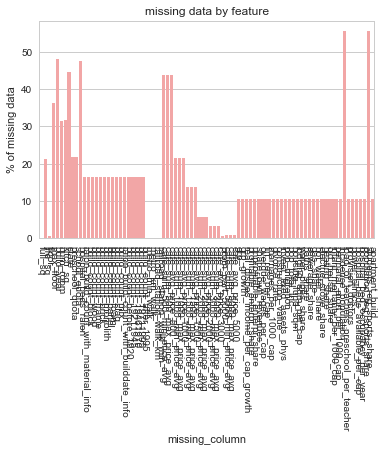

In [12]:
dd.plot_missing_data(df_tm)

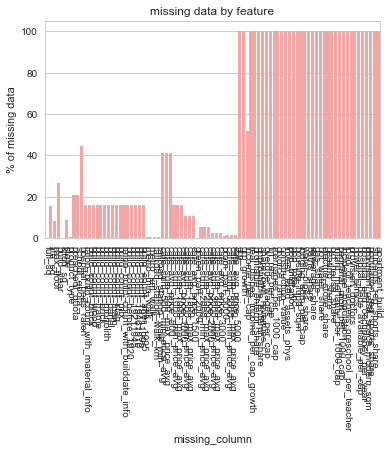

In [13]:
dd.plot_missing_data(df_testm)

### Missing data Imputation

 - Fill the missing values with other columns, which is highly correlated, by using regression. 

In [36]:
df_tm, df_testm = pp.impute_by_regression3(df_tm, df_testm, 10, 0.3)

1번째 반복중...
invest_fixed_assets_phys를 gas_share와 imputing 중...
invest_fixed_assets_phys를 population_reg_sports_share와 imputing 중...
invest_fixed_assets_phys를 hospital_beds_available_per_cap와 imputing 중...
invest_fixed_assets_phys를 electric_stove_share와 imputing 중...
invest_fixed_assets_phys를 perinatal_mort_per_1000_cap와 imputing 중...
invest_fixed_assets_phys를 grp와 imputing 중...
invest_fixed_assets_phys를 marriages_per_1000_cap와 imputing 중...
invest_fixed_assets_phys를 fin_res_per_cap와 imputing 중...
invest_fixed_assets_phys를 fixed_basket와 imputing 중...
pop_total_inc를 load_of_teachers_preschool_per_teacher와 imputing 중...
pop_total_inc를 pop_migration와 imputing 중...
pop_total_inc를 infant_mortarity_per_1000_cap와 imputing 중...
pop_total_inc를 electric_stove_share와 imputing 중...
pop_total_inc를 marriages_per_1000_cap와 imputing 중...
pop_total_inc를 provision_doctors와 imputing 중...
pop_total_inc를 real_dispos_income_per_cap_growth와 imputing 중...
pop_total_inc를 perinatal_mort_per_1000_cap와 imputing 중..

raion_build_count_with_builddate_info를 build_count_after_1995와 imputing 중...
raion_build_count_with_builddate_info를 build_count_19461970와 imputing 중...
raion_build_count_with_builddate_info를 build_count_monolith와 imputing 중...
raion_build_count_with_builddate_info를 build_count_mix와 imputing 중...
raion_build_count_with_builddate_info를 build_count_brick와 imputing 중...
raion_build_count_with_builddate_info를 build_count_panel와 imputing 중...
cafe_sum_2000_max_price_avg를 cafe_avg_price_2000와 imputing 중...
cafe_sum_2000_max_price_avg를 cafe_sum_2000_min_price_avg와 imputing 중...
cafe_sum_2000_max_price_avg를 cafe_sum_1500_max_price_avg와 imputing 중...
cafe_sum_2000_max_price_avg를 cafe_avg_price_1500와 imputing 중...
cafe_sum_2000_max_price_avg를 cafe_sum_1500_min_price_avg와 imputing 중...
cafe_sum_2000_max_price_avg를 cafe_sum_3000_min_price_avg와 imputing 중...
cafe_sum_1500_max_price_avg를 cafe_avg_price_1500와 imputing 중...
cafe_sum_1500_max_price_avg를 cafe_sum_1500_min_price_avg와 imputing 중...
cafe_su

In [46]:
df_testm = df_testm.replace(np.nan, np.mean)

In [38]:
assert(df_tm.isnull().sum().sum() == 0)
df_tm.to_csv('preprocessed_input/train_macro.csv', index=False)

In [47]:
assert(df_testm.isnull().sum().sum() == 0)
df_testm.to_csv('preprocessed_input/test_macro.csv', index=False)

In [49]:
df_tm = pd.read_csv('preprocessed_input/train_macro.csv', parse_dates=['timestamp'])
df_testm = pd.read_csv('preprocessed_input/test_macro.csv', parse_dates=['timestamp'])
assert(df_tm.isnull().sum().sum() == 0)
assert(df_testm.isnull().sum().sum() == 0)

/Users/MAC/.pyenv/versions/anaconda3-4.4.0/envs/python_al/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (231) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Regression with All Features

In [217]:
numeric_ivs = df_tm._get_numeric_data().columns.drop('price_doc')
cate_ivs = list(set(df_tm.columns.drop('timestamp')) - set(df_tm._get_numeric_data().columns))

In [228]:
df_tm.shape

(21570, 375)

In [218]:
formula = smh.make_statsmodels_ols_formula(numeric_ivs, cate_ivs, 'price_doc', degree=1, scale=False)

In [219]:
model = sm.OLS.from_formula(formula, data=df_tm)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_doc   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     64.60
Date:                Tue, 28 Nov 2017   Prob (F-statistic):               0.00
Time:                        12:57:27   Log-Likelihood:            -3.5523e+05
No. Observations:               21570   AIC:                         7.111e+05
Df Residuals:                   21257   BIC:                         7.136e+05
Df Model:                         312                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     -0.0348      0.073     -0.477      0.634      -0.178       0.108
C(detention_facility_raion)[T.yes]          9.044e+05   2.23e+05      4.055      0.000    4.67e+05    1.34e+06
C(radiation_raion)[T.yes]                  -2.205e+05    1.4e+05     -1.579      0.114   -4.94e+05    5.32e+04
C(culture_objects_top_25)[T.yes]            1.205e+06   4.17e+05      2.887      0.004    3.87e+05    2.02e+06
C(railroad_1line)[T.yes]                   -1.144e+06   1.72e+05     -6.629      0.000   -1.48e+06   -8.05e+05
C(oil_chemistry_raion)[T.yes]               3.567e+05   4.85e+05      0.736      0.462   -5.93e+05    1.31e+06
C(product_type)[T.OwnerOccupier]             1.05e+06    1.1e+05      9.533      0.000    8.34e+05    1.27e+06
C(water_1line)[T.yes]                       1.154e+05   1.23e+05      0.937      0.349   -1.26e+05    3.57e+05
C(big_road1_1line)[T.yes]                   8.267e+04   1.75e+05      0.471      0.637   -2.61e+05    4.26e+05
C(incineration_raion)[T.yes]                1.346e+06   4.43e+05      3.037      0.002    4.77e+05    2.21e+06
C(nuclear_reactor_raion)[T.yes]            -8.682e+05   2.96e+05     -2.937      0.003   -1.45e+06   -2.89e+05
C(big_market_raion)[T.yes]                   1.65e+06   2.76e+05      5.984      0.000    1.11e+06    2.19e+06
C(thermal_power_plant_raion)[T.yes]         1.214e+05   2.71e+05      0.447      0.655    -4.1e+05    6.53e+05
C(railroad_terminal_raion)[T.yes]           1.145e+06    3.2e+05      3.577      0.000    5.18e+05    1.77e+06
C(ecology)[T.good]                          9.974e+05   2.79e+05      3.573      0.000     4.5e+05    1.54e+06
C(ecology)[T.nodata]                       -1.479e+05   7.06e+05     -0.210      0.834   -1.53e+06    1.24e+06
C(ecology)[T.poor]                          5.895e+05   1.94e+05      3.040      0.002    2.09e+05     9.7e+05
C(ecology)[T.satisfactory]                 -4.787e+04   2.64e+05     -0.181      0.856   -5.65e+05    4.69e+05
C(material)[T.b]                            2.242e+05   1.98e+05      1.131      0.258   -1.64e+05    6.13e+05
C(material)[T.c]                            2.164e+05   2.14e+05      1.010      0.313   -2.04e+05    6.36e+05
C(material)[T.d]                            5.663e+05   3.48e+06      0.163      0.871   -6.26e+06     7.4e+06
C(material)[T.e]                            1.006e+06   2.18e+05      4.612      0.000    5.78e+05    1.43e+06
C(material)[T.f]                           -7.105e+05   2.24e+05     -3.171      0.002   -1.15e+06   -2.71e+05
full_sq                                     2.043e+04   1594.901     12.809      0.000    1.73e+04    2.36e+04
life_sq                                     9.838e+04   1633.964     60.210      0.000

In [220]:
anova = sm.stats.anova_lm(result, typ=2)
anova

sum_sq       df  \
C(detention_facility_raion)                 1.968386e+14      1.0   
C(radiation_raion)                          2.986440e+13      1.0   
C(culture_objects_top_25)                   9.976569e+13      1.0   
C(railroad_1line)                           5.262163e+14      1.0   
C(oil_chemistry_raion)                      6.481818e+12      1.0   
C(product_type)                             1.088115e+15      1.0   
C(water_1line)                              1.050710e+13      1.0   
C(big_road1_1line)                          2.659728e+12      1.0   
C(incineration_raion)                       1.104160e+14      1.0   
C(nuclear_reactor_raion)                    1.033010e+14      1.0   
C(big_market_raion)                         4.287483e+14      1.0   
C(thermal_power_plant_raion)                2.396110e+12      1.0   
C(railroad_terminal_raion)                  1.532306e+14      1.0   
C(ecology)                                  5.418378e+14      4.0   
C(material)                                 1.553747e+15      5.0   
full_sq                                     1.964535e+15      1.0   
life_sq                                     4.340722e+16      1.0   
floor                                       3.909971e+14      1.0   
max_floor                                   7.260122e+14      1.0   
build_year                                  3.144265e+13      1.0   
num_room                                    2.122509e+14      1.0   
kitch_sq                                    6.177267e+14      1.0   
state                                       1.473518e+15      1.0   
area_m                                      8.583963e+12      1.0   
raion_popul                                 1.561697e+13      1.0   
green_zone_part                             3.096209e+13      1.0   
indust_part                                 1.716181e+12      1.0   
children_preschool                          7.902109e+12      1.0   
preschool_quota                             2.207762e+14      1.0   
preschool_education_centers_raion           1.315846e+13      1.0   
children_school                             3.358400e+13      1.0   
school_quota                                1.374918e+14      1.0   
school_education_centers_raion              3.222181e+14      1.0   
school_education_centers_top_20_raion       1.290667e+13      1.0   
hospital_beds_raion                         3.957165e+14      1.0   
healthcare_centers_raion                    1.036483e+13      1.0   
university_top_20_raion                     8.002640e+12      1.0   
sport_objects_raion                         4.490677e+13      1.0   
additional_education_raion                  1.891206e+14      1.0   
culture_objects_top_25_raion                2.853984e+12      1.0   
shopping_centers_raion                      3.234402e+11      1.0   
office_raion                                1.202827e+13      1.0   
full_all                                    4.102323e+13      1.0   
male_f                                      4.102745e+13      1.0   
female_f                                    4.102271e+13      1.0   
young_all                                   1.237448e+14      1.0   
young_male                                  8.814736e+13      1.0   
young_female                                8.905788e+13      1.0   
work_all                                    1.268001e+14      1.0   
work_male                                   1.440174e+14      1.0   
work_female                                 1.440074e+14      1.0   
ekder_all                                   1.811785e+13      1.0   
ekder_male                                  8.407982e+12      1.0   
ekder_female                                8.402155e+12      1.0   
c_0_6_all                                   7.902109e+12      1.0   
c_0_6_male                                  7.689933e+12      1.0   
c_0_6_female                                7.965125e+12      1.0   
c_7_14_all                                  3.35

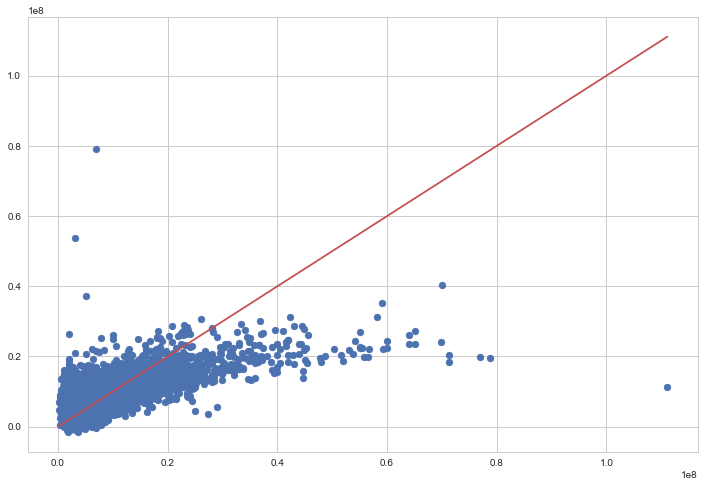

In [237]:
plt.scatter(df_tm.price_doc, result.predict(df_tm[df_tm.columns.drop('price_doc')]))
x = np.linspace(min(df_tm.price_doc), max(df_tm.price_doc), 1000)
plt.plot(x, x,color='r' )
plt.show()

#### Eliminate outliers which have large leaverage and residual in accordance with Cook's Distance. 

In [58]:
model, result2 = pp.remove_outliers(df_tm, formula, repeat=3)
result2.summary()

1번 반복중... 아웃라이어 찾는중...
아웃라이어는 1428개 입니다.
2번 반복중... 아웃라이어 찾는중...
아웃라이어는 1170개 입니다.
3번 반복중... 아웃라이어 찾는중...
아웃라이어는 988개 입니다.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     scale(np.log(price_doc))   R-squared:                       0.676
Model:                                  OLS   Adj. R-squared:                  0.675
Method:                       Least Squares   F-statistic:                     691.4
Date:                      Wed, 29 Nov 2017   Prob (F-statistic):               0.00
Time:                              11:18:37   Log-Likelihood:                -16238.
No. Observations:                     18972   AIC:                         3.259e+04
Df Residuals:                         18914   BIC:                         3.305e+04
Df Model:                                57                                         
Covariance Type:                  nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                      -0.0808      0.019     -4.211      0.000      -0.118      -0.043
C(big_market_raion)[T.yes]                     -0.1676      0.018     -9.245      0.000      -0.203      -0.132
C(railroad_1line)[T.yes]                       -0.5293      0.027    -19.866      0.000      -0.582      -0.477
C(material)[T.b]                                0.3784      0.013     29.607      0.000       0.353       0.403
C(material)[T.c]                                0.3107      0.019     16.466      0.000       0.274       0.348
C(material)[T.e]                                0.3433      0.020     17.241      0.000       0.304       0.382
C(material)[T.f]                                0.1861      0.022      8.370      0.000       0.143       0.230
C(ecology)[T.good]                             -0.0852      0.020     -4.171      0.000      -0.125      -0.045
C(ecology)[T.nodata]                           -0.4445      0.025    -18.028      0.000      -0.493      -0.396
C(ecology)[T.poor]                             -0.0039      0.018     -0.212      0.832      -0.040       0.032
C(ecology)[T.satisfactory]                      0.0927      0.023      3.975      0.000       0.047       0.138
scale(life_sq)                                  0.7540      0.011     69.003      0.000       0.733       0.775
scale(floor)                                    0.2001      0.014     14.803      0.000       0.174       0.227
scale(kitch_sq)                                 0.1137      0.007     16.608      0.000       0.100       0.127
scale(healthcare_centers_raion)                 0.0599      0.015      3.940      0.000       0.030       0.090
scale(culture_objects_top_25_raion)             0.4088      0.033     12.269      0.000       0.344       0.474
scale(build_count_block)                       -0.1048      0.016     -6.416      0.000      -0.137      -0.073
scale(build_count_frame)                        0.0417      0.021      2.018      0.044       0.001       0.082
scale(build_count_brick)                        0.1894      0.015     12.469      0.000       0.160       0.219
scale(build_count_monolith)                     0.0666      0.016      4.282      0.000       0.036       0.097
scale(build_count_foam)                        -0.0200      0.027     -0.748      0.454      -0.072       0.032
scale(green_zone_km)                           -0.0403      0.011     -3.656      0.000      -0.062      -0.019
scale(railroad_station_avto_min)                0.0048      0.014      0.350      0.726      -0.022       0.032
scale(big_road1_km)                            -0.0259      0.016     -1.617      0.106      -0.057      

In [251]:
pred = result.predict(df_tm[df_tm.columns.drop('price_doc')])
# df_tm.price_doc

0        3.728508e+06
3        4.704475e+06
5        1.263753e+06
7        7.756986e+06
8        1.110353e+07
9        9.265184e+05
10       5.413741e+06
11       7.702890e+06
12       3.044744e+06
13       3.419093e+06
14       4.278169e+06
16       5.741831e+06
17       1.259389e+07
18       1.020681e+07
19       3.533088e+06
20       5.157158e+06
21       7.167584e+06
22       9.498793e+06
23       1.246599e+07
24       1.171951e+07
25       7.139592e+06
27       6.306507e+06
28       2.532068e+06
29       6.895294e+06
31       3.869271e+06
32       2.992916e+06
33       2.083675e+06
34       2.956289e+06
36       7.875930e+06
37       1.622129e+07
39       2.087187e+06
40       9.540992e+06
42       4.010373e+06
44       1.175597e+06
45       1.107909e+07
46       4.296041e+06
51       1.983970e+06
52       2.974611e+06
54       1.386617e+07
57       4.768185e+06
59       4.234619e+06
62       5.019945e+06
64       7.171662e+06
66       8.837335e+05
68       1.124974e+07
69       5

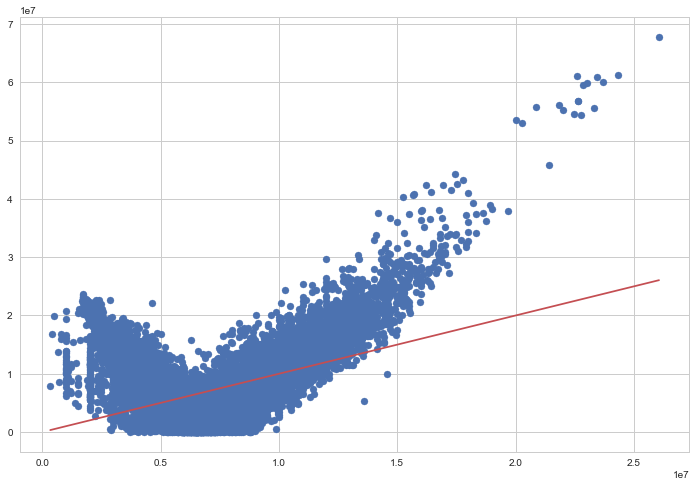

In [252]:
plt.scatter(df_tm.price_doc, pred*np.sqrt(np.var(df_tm.price_doc)) + np.mean(df_tm.price_doc))

x = np.linspace(min(df_tm.price_doc), max(df_tm.price_doc), 1000)
plt.plot(x, x,color='r' )
plt.show()

# It seems like non_linear

#### According to ANOVA Test, exclude useless columns, on 1% of level of significant

In [239]:
result, selected_ivs = fs.by_f_test(df_tm, formula, 10)
result.summary()

0번째 골라내는 중...
0.877492891924 0.875317505912 1.57556131002e+18
173 ['C(detention_facility_raion)', 'C(culture_objects_top_25)', 'C(railroad_1line)', 'C(oil_chemistry_raion)', 'C(product_type)', 'C(nuclear_reactor_raion)', 'C(big_market_raion)', 'C(ecology)', 'C(material)', 'full_sq', 'life_sq', 'floor', 'max_floor', 'build_year', 'num_room', 'kitch_sq', 'state', 'area_m', 'raion_popul', 'children_preschool', 'preschool_quota', 'preschool_education_centers_raion', 'children_school', 'school_quota', 'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion', 'culture_objects_top_25_raion', 'shopping_centers_raion', 'full_all', 'male_f', 'female_f', 'young_all', 'ekder_all', 'ekder_male', 'ekder_female', 'c_0_6_all', 'c_0_6_male', 'c_0_6_female', 'c_7_14_all', 'c_7_14_male', 'c_7_14_female', 'c_16_29_all', 'c_16_29_male', 'c_16_29_female', 'c_0_13_all', 'c_0_13_male', 'c_0_13_female', 'raion_build_count_with_material_info', 'build_count_block

0.867793282697 0.866678844992 1.21201832224e+16
147 ['C(detention_facility_raion)', 'C(culture_objects_top_25)', 'C(railroad_1line)', 'C(big_market_raion)', 'C(ecology)', 'C(material)', 'full_sq', 'life_sq', 'floor', 'max_floor', 'build_year', 'num_room', 'kitch_sq', 'state', 'area_m', 'children_preschool', 'preschool_quota', 'children_school', 'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'culture_objects_top_25_raion', 'shopping_centers_raion', 'full_all', 'male_f', 'female_f', 'young_all', 'ekder_all', 'ekder_male', 'ekder_female', 'c_0_6_all', 'c_0_6_male', 'c_0_6_female', 'c_7_14_all', 'c_7_14_male', 'c_7_14_female', 'c_16_29_all', 'c_16_29_male', 'c_16_29_female', 'c_0_13_all', 'c_0_13_male', 'c_0_13_female', 'raion_build_count_with_material_info', 'build_count_block', 'build_count_wood', 'build_count_frame', 'build_count_brick', 'build_count_monolith', 'build_count_panel', 'build_count_foam', 'build_count_slag', 'build_count_mix', 'raion_bu

0.867793282697 0.866678844992 1.21201832224e+16
147 ['C(detention_facility_raion)', 'C(culture_objects_top_25)', 'C(railroad_1line)', 'C(big_market_raion)', 'C(ecology)', 'C(material)', 'full_sq', 'life_sq', 'floor', 'max_floor', 'build_year', 'num_room', 'kitch_sq', 'state', 'area_m', 'children_preschool', 'preschool_quota', 'children_school', 'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'culture_objects_top_25_raion', 'shopping_centers_raion', 'full_all', 'male_f', 'female_f', 'young_all', 'ekder_all', 'ekder_male', 'ekder_female', 'c_0_6_all', 'c_0_6_male', 'c_0_6_female', 'c_7_14_all', 'c_7_14_male', 'c_7_14_female', 'c_16_29_all', 'c_16_29_male', 'c_16_29_female', 'c_0_13_all', 'c_0_13_male', 'c_0_13_female', 'raion_build_count_with_material_info', 'build_count_block', 'build_count_wood', 'build_count_frame', 'build_count_brick', 'build_count_monolith', 'build_count_panel', 'build_count_foam', 'build_count_slag', 'build_count_mix', 'raion_bu

0.867793282697 0.866678844992 1.21201832224e+16
147 ['C(detention_facility_raion)', 'C(culture_objects_top_25)', 'C(railroad_1line)', 'C(big_market_raion)', 'C(ecology)', 'C(material)', 'full_sq', 'life_sq', 'floor', 'max_floor', 'build_year', 'num_room', 'kitch_sq', 'state', 'area_m', 'children_preschool', 'preschool_quota', 'children_school', 'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'culture_objects_top_25_raion', 'shopping_centers_raion', 'full_all', 'male_f', 'female_f', 'young_all', 'ekder_all', 'ekder_male', 'ekder_female', 'c_0_6_all', 'c_0_6_male', 'c_0_6_female', 'c_7_14_all', 'c_7_14_male', 'c_7_14_female', 'c_16_29_all', 'c_16_29_male', 'c_16_29_female', 'c_0_13_all', 'c_0_13_male', 'c_0_13_female', 'raion_build_count_with_material_info', 'build_count_block', 'build_count_wood', 'build_count_frame', 'build_count_brick', 'build_count_monolith', 'build_count_panel', 'build_count_foam', 'build_count_slag', 'build_count_mix', 'raion_bu

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       scale(price_doc)   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     778.7
Date:                Tue, 28 Nov 2017   Prob (F-statistic):               0.00
Time:                        13:23:00   Log-Likelihood:                -7259.5
No. Observations:               17826   AIC:                         1.482e+04
Df Residuals:                   17676   BIC:                         1.599e+04
Df Model:                         149                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -4.7290      0.657     -7.200      0.000      -6.016      -3.442
C(detention_facility_raion)[T.yes]        0.1892      0.020      9.697      0.000       0.151       0.227
C(culture_objects_top_25)[T.yes]          0.3845      0.041      9.276      0.000       0.303       0.466
C(railroad_1line)[T.yes]                 -0.2602      0.020    -13.011      0.000      -0.299      -0.221
C(big_market_raion)[T.yes]                0.1238      0.024      5.227      0.000       0.077       0.170
C(ecology)[T.good]                        0.2015      0.027      7.494      0.000       0.149       0.254
C(ecology)[T.nodata]                     -0.1481      0.059     -2.531      0.011      -0.263      -0.033
C(ecology)[T.poor]                        0.1885      0.019      9.696      0.000       0.150       0.227
C(ecology)[T.satisfactory]                0.1771      0.027      6.629      0.000       0.125       0.229
C(material)[T.b]                          0.1348      0.012     11.706      0.000       0.112       0.157
C(material)[T.c]                          0.1373      0.015      8.869      0.000       0.107       0.168
C(material)[T.e]                          0.1210      0.016      7.563      0.000       0.090       0.152
C(material)[T.f]                          0.0125      0.017      0.746      0.455      -0.020       0.045
full_sq                                   0.0365      0.000    102.529      0.000       0.036       0.037
life_sq                                   0.0012      0.000      4.321      0.000       0.001       0.002
floor                                     0.0048      0.001      6.702      0.000       0.003       0.006
max_floor                                 0.0182      0.001     17.760      0.000       0.016       0.020
build_year                                0.0012      0.000      3.800      0.000       0.001       0.002
num_room                                  0.0651      0.008      8.403      0.000       0.050       0.080
kitch_sq                                  0.0102      0.001      9.923      0.000       0.008       0.012
state                                     0.0921      0.006     15.870      0.000       0.081       0.103
area_m                                -3.301e-09   7.81e-10     -4.229      0.000   -4.83e-09   -1.77e-09
children_preschool                        0.2762      0.041      6.770      0.000       0.196       0.356
preschool_quota                        8.952e-05   7.33e-06     12.211      0.000    7.52e-05       0.000
children_school                           0.5954      0.063      9.436      0.000       0.472       0.719
school_education_centers_raion            0.0198      0.003      5.899      0.000       0.013       0.026
hospital_

In [240]:
anova = sm.stats.anova_lm(result, typ=2)
anova

sum_sq       df             F  \
C(detention_facility_raion)              12.538024      1.0     94.038490   
C(culture_objects_top_25)                11.471133      1.0     86.036533   
C(railroad_1line)                        22.571105      1.0    169.289254   
C(big_market_raion)                       3.642783      1.0     27.321835   
C(ecology)                               17.722844      4.0     33.231504   
C(material)                              27.693680      4.0     51.927481   
full_sq                                1401.583167      1.0  10512.244221   
life_sq                                   2.489261      1.0     18.670117   
floor                                     5.988823      1.0     44.917753   
max_floor                                42.053998      1.0    315.416099   
build_year                                1.925375      1.0     14.440825   
num_room                                  9.414159      1.0     70.608682   
kitch_sq                                 13.128944      1.0     98.470547   
state                                    33.579439      1.0    251.854666   
area_m                                    2.383976      1.0     17.880450   
children_preschool                        6.110892      1.0     45.833302   
preschool_quota                          19.880910      1.0    149.112079   
children_school                          11.872462      1.0     89.046605   
school_education_centers_raion            4.639837      1.0     34.800004   
hospital_beds_raion                       6.030894      1.0     45.233299   
healthcare_centers_raion                  7.526941      1.0     56.454046   
culture_objects_top_25_raion              6.914054      1.0     51.857235   
shopping_centers_raion                    2.346037      1.0     17.595895   
full_all                                 12.011808      1.0     90.091732   
male_f                                   12.012385      1.0     90.096064   
female_f                                 12.011158      1.0     90.086862   
young_all                                 1.672023      1.0     12.540617   
ekder_all                                18.458549      1.0    138.443996   
ekder_male                               18.460189      1.0    138.456298   
ekder_female                             18.457846      1.0    138.438721   
c_0_6_all                                 6.110890      1.0     45.833289   
c_0_6_male                                6.141890      1.0     46.065798   
c_0_6_female                              6.111040      1.0     45.834416   
c_7_14_all                               11.872461      1.0     89.046598   
c_7_14_male                              11.893238      1.0     89.202432   
c_7_14_female                            11.872823      1.0     89.049313   
c_16_29_all                              20.057876      1.0    150.439369   
c_16_29_male                             20.058651      1.0    150.445181   
c_16_29_female                           20.056743      1.0    150.430870   
c_0_13_all                               11.817258      1.0     88.632556   
c_0_13_male                              11.808909      1.0     88.569938   
c_0_13_female                            11.820083      1.0     88.653748   
raion_build_count_with_material_info      9.510169      1.0     71.328785   
build_count_block                         9.390906      1.0     70.434279   
build_count_wood                          9.240312      1.0     69.304780   
build_count_frame                         9.466438      1.0     71.000785   
build_count_brick                         9.307805      1.0     69.810999   
build_count_monolith                      9.302890      1.0     69.774136   
build_count_panel                         9.295210      1.0     69.716533   
build_count_foam                          7.778322      1.0     58.339470   
build_count_slag                          9.533579      1.0     71.504363   
build_count_mix                         

In [253]:
df_tm.tail(1)

timestamp  full_sq  life_sq  floor  max_floor material  build_year  \
21569 2015-06-30     43.0     28.0    1.0        9.0        b      1968.0   

       num_room  kitch_sq  state product_type       area_m  raion_popul  \
21569       2.0       6.0    2.0   Investment  4395332.782        94561   

       green_zone_part  indust_part  children_preschool  preschool_quota  \
21569         0.063755     0.038693                6120           2215.0   

       preschool_education_centers_raion  children_school  school_quota  \
21569                                  4             6533        5824.0   

       school_education_centers_raion  school_education_centers_top_20_raion  \
21569                               4                                      0   

       hospital_beds_raion  healthcare_centers_raion  university_top_20_raion  \
21569               1015.0                         2                        0   

       sport_objects_raion  additional_education_raion culture_objects_top_25  \
21569                    7                           1                     no   

       culture_objects_top_25_raion  shopping_centers_raion  office_raion  \
21569                             0                       5             1   

      thermal_power_plant_raion incineration_raion oil_chemistry_raion  \
21569                        no                 no                  no   

      radiation_raion railroad_terminal_raion big_market_raion  \
21569             yes                      no               no   

      nuclear_reactor_raion detention_facility_raion  full_all  male_f  \
21569                    no                       no     72131   34296   

       female_f  young_all  young_male  young_female  work_all  work_male  \
21569     37835      13523        6724          6799     56908      27219   

       work_female  ekder_all  ekder_male  ekder_female  c_0_6_all  \
21569        29689      24130        7105         17025       6120   

       c_0_6_male  c_0_6_female  c_7_14_all  c_7_14_male  c_7_14_female  \
21569        3096          3024        6533         3192           3341   

       c_0_17_all  c_0_17_male  c_0_17_female  c_16_29_all  c_16_29_male  \
21569       14994         7422           7572        17070          7717   

       c_16_29_female  c_0_13_all  c_0_13_male  c_0_13_female  \
21569            9353       11903         5928           5975   

       raion_build_count_with_material_info  build_count_block  \
21569                                 304.0              108.0   

       build_count_wood  build_count_frame  build_count_brick  \
21569               2.0                0.0              105.0   

       build_count_monolith  build_count_panel  build_count_foam  \
21569                   4.0               85.0               0.0   

       build_count_slag  build_count_mix  \
21569               0.0              0.0   

       raion_build_count_with_builddate_info  build_count_before_1920  \
21569                                  303.0                      1.0   

       build_count_19211945  build_count_19461970  build_count_19711995  \
21569                   2.0                 220.0                  66.0   

       build_count_after_1995  metro_min_avto  metro_km_avto  metro_min_walk  \
21569                    14.0        0.584636        0.45465        5.455795   

       metro_km_walk  kindergarten_km  school_km   park_km  green_zone_km  \
21569        0.45465         0.093619    0.37895  0.848766       0.559699   

       industrial_km  water_treatment_km  cemetery_km  incineration_km  \
21569       0.455194            10.45101     1.791075         8.334879   

       railroad_station_walk_km  railroad_station_walk_min  \
21569                  2.037754                  24.453053   

       railroad_station_avto_km  railroad_station_avto_min  \
21569                  2.037754                   3.604917   

       public_transport_station_km  public_transport_station_min_walk  \
21569            

#### To reduce multicollinearity, according to Variance Inflation Factor,  eliminate more columns (if VIF is higher than 10)

In [255]:
selected_ivs

['C(detention_facility_raion)',
 'C(culture_objects_top_25)',
 'C(railroad_1line)',
 'C(big_market_raion)',
 'C(ecology)',
 'C(material)',
 'full_sq',
 'life_sq',
 'floor',
 'max_floor',
 'build_year',
 'num_room',
 'kitch_sq',
 'state',
 'area_m',
 'children_preschool',
 'preschool_quota',
 'children_school',
 'school_education_centers_raion',
 'hospital_beds_raion',
 'healthcare_centers_raion',
 'culture_objects_top_25_raion',
 'shopping_centers_raion',
 'full_all',
 'male_f',
 'female_f',
 'young_all',
 'ekder_all',
 'ekder_male',
 'ekder_female',
 'c_0_6_all',
 'c_0_6_male',
 'c_0_6_female',
 'c_7_14_all',
 'c_7_14_male',
 'c_7_14_female',
 'c_16_29_all',
 'c_16_29_male',
 'c_16_29_female',
 'c_0_13_all',
 'c_0_13_male',
 'c_0_13_female',
 'raion_build_count_with_material_info',
 'build_count_block',
 'build_count_wood',
 'build_count_frame',
 'build_count_brick',
 'build_count_monolith',
 'build_count_panel',
 'build_count_foam',
 'build_count_slag',
 'build_count_mix',
 'raion_bu

In [256]:
selected_features = ['railroad_1line',
 'material',
 'detention_facility_raion',
 'big_market_raion',
 'culture_objects_top_25',
 'ecology',
 'full_sq',
 'life_sq',
 'floor',
 'max_floor',
 'build_year',
 'num_room',
 'kitch_sq',
 'state',
 'area_m',
 'children_preschool',
 'preschool_quota',
 'children_school',
 'school_education_centers_raion',
 'hospital_beds_raion',
 'healthcare_centers_raion',
 'culture_objects_top_25_raion',
 'shopping_centers_raion',
 'full_all',
 'male_f',
 'female_f',
 'young_all',
 'ekder_all',
 'ekder_male',
 'ekder_female',
 'c_0_6_all',
 'c_0_6_male',
 'c_0_6_female',
 'c_7_14_all',
 'c_7_14_male',
 'c_7_14_female',
 'c_16_29_all',
 'c_16_29_male',
 'c_16_29_female',
 'c_0_13_all',
 'c_0_13_male',
 'c_0_13_female',
 'raion_build_count_with_material_info',
 'build_count_block',
 'build_count_wood',
 'build_count_frame',
 'build_count_brick',
 'build_count_monolith',
 'build_count_panel',
 'build_count_foam',
 'build_count_slag',
 'build_count_mix',
 'raion_build_count_with_builddate_info',
 'build_count_before_1920',
 'build_count_19211945',
 'build_count_19461970',
 'build_count_19711995',
 'build_count_after_1995',
 'metro_min_avto',
 'metro_min_walk',
 'metro_km_walk',
 'kindergarten_km',
 'school_km',
 'green_zone_km',
 'cemetery_km',
 'railroad_station_walk_km',
 'railroad_station_walk_min',
 'railroad_station_avto_min',
 'ttk_km',
 'sadovoe_km',
 'bulvar_ring_km',
 'kremlin_km',
 'big_road1_km',
 'big_road2_km',
 'railroad_km',
 'zd_vokzaly_avto_km',
 'bus_terminal_avto_km',
 'oil_chemistry_km',
 'nuclear_reactor_km',
 'big_market_km',
 'detention_facility_km',
 'public_healthcare_km',
 'university_km',
 'workplaces_km',
 'shopping_centers_km',
 'office_km',
 'big_church_km',
 'church_synagogue_km',
 'mosque_km',
 'exhibition_km',
 'prom_part_500',
 'office_count_500',
 'office_sqm_500',
 'cafe_count_500_price_4000',
 'church_count_500',
 'office_sqm_1000',
 'cafe_count_1000_price_4000',
 'big_church_count_1000',
 'green_part_1500',
 'office_count_1500',
 'office_sqm_1500',
 'trc_count_1500',
 'cafe_sum_1500_min_price_avg',
 'cafe_sum_1500_max_price_avg',
 'cafe_avg_price_1500',
 'cafe_count_1500_price_high',
 'mosque_count_1500',
 'leisure_count_1500',
 'green_part_2000',
 'prom_part_2000',
 'office_count_2000',
 'office_sqm_2000',
 'trc_count_2000',
 'cafe_count_2000',
 'cafe_count_2000_na_price',
 'cafe_count_2000_price_500',
 'cafe_count_2000_price_1000',
 'cafe_count_2000_price_4000',
 'cafe_count_2000_price_high',
 'big_church_count_2000',
 'leisure_count_2000',
 'green_part_3000',
 'prom_part_3000',
 'office_sqm_3000',
 'cafe_count_3000',
 'cafe_sum_3000_min_price_avg',
 'cafe_sum_3000_max_price_avg',
 'cafe_avg_price_3000',
 'church_count_3000',
 'leisure_count_3000',
 'market_count_3000',
 'green_part_5000',
 'prom_part_5000',
 'office_sqm_5000',
 'trc_count_5000',
 'cafe_sum_5000_min_price_avg',
 'cafe_sum_5000_max_price_avg',
 'cafe_avg_price_5000',
 'cafe_count_5000_price_4000',
 'cafe_count_5000_price_high',
 'mosque_count_5000',
 'leisure_count_5000',
 'market_count_5000',
 'gdp_quart',
 'gdp_quart_growth',
 'net_capital_export',
 'average_provision_of_build_contract']
len(selected_features)
df_tm[selected_features].tail(1)

railroad_1line material detention_facility_raion big_market_raion  \
21569             no        b                       no               no   

      culture_objects_top_25 ecology  full_sq  life_sq  floor  max_floor  \
21569                     no    poor     43.0     28.0    1.0        9.0   

       build_year  num_room  kitch_sq  state       area_m  children_preschool  \
21569      1968.0       2.0       6.0    2.0  4395332.782                6120   

       preschool_quota  children_school  school_education_centers_raion  \
21569           2215.0             6533                               4   

       hospital_beds_raion  healthcare_centers_raion  \
21569               1015.0                         2   

       culture_objects_top_25_raion  shopping_centers_raion  full_all  male_f  \
21569                             0                       5     72131   34296   

       female_f  young_all  ekder_all  ekder_male  ekder_female  c_0_6_all  \
21569     37835      13523      24130        7105         17025       6120   

       c_0_6_male  c_0_6_female  c_7_14_all  c_7_14_male  c_7_14_female  \
21569        3096          3024        6533         3192           3341   

       c_16_29_all  c_16_29_male  c_16_29_female  c_0_13_all  c_0_13_male  \
21569        17070          7717            9353       11903         5928   

       c_0_13_female  raion_build_count_with_material_info  build_count_block  \
21569           5975                                 304.0              108.0   

       build_count_wood  build_count_frame  build_count_brick  \
21569               2.0                0.0              105.0   

       build_count_monolith  build_count_panel  build_count_foam  \
21569                   4.0               85.0               0.0   

       build_count_slag  build_count_mix  \
21569               0.0              0.0   

       raion_build_count_with_builddate_info  build_count_before_1920  \
21569                                  303.0                      1.0   

       build_count_19211945  build_count_19461970  build_count_19711995  \
21569                   2.0                 220.0                  66.0   

       build_count_after_1995  metro_min_avto  metro_min_walk  metro_km_walk  \
21569                    14.0        0.584636        5.455795        0.45465   

       kindergarten_km  school_km  green_zone_km  cemetery_km  \
21569         0.093619    0.37895       0.559699     1.791075   

       railroad_station_walk_km  railroad_station_walk_min  \
21569                  2.037754                  24.453053   

       railroad_station_avto_min    ttk_km  sadovoe_km  bulvar_ring_km  \
21569                   3.604917  6.809408    9.675169       10.228634   

       kremlin_km  big_road1_km  big_road2_km  railroad_km  \
21569   11.812614      1.920884       2.08923     0.734949   

       zd_vokzaly_avto_km  bus_terminal_avto_km  oil_chemistry_km  \
21569           12.243439              5.645123          3.261652   

       nuclear_reactor_km  big_market_km  detention_facility_km  \
21569           14.359141      14.028112               8.868202   

       public_healthcare_km  university_km  workplaces_km  \
21569              0.964828       2.731394       3.065101   

       shopping_centers_km  office_km  big_church_km  church_synagogue_km  \
21569             0.224601   2.108265       0.480531             0.867332   

       mosque_km  exhibition_km  prom_part_500  office_count_500  \
21569   8.987913       2.477068           1.26                 0   

       office_sqm_500  cafe_count_500_price_4000  church_count_500  \
21569               0                          0                 0   

       office_sqm_1000  cafe_count_1000_price_4000  big_church_count_1000  \
21569                0                           0                      2   

       green_part_1500  office_count_1500  office_sqm_1500  trc_count_1500  \
21569            19.95                  0                0               5   

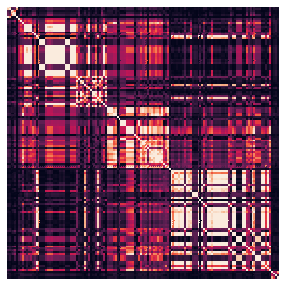

In [257]:
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(df_tm[selected_features]._get_numeric_data().corr().abs(), vmax=0.8, square=True, xticklabels=False, yticklabels=False, cbar=False)

In [258]:
selected_numeric_features = df_tm[selected_features]._get_numeric_data().columns
selected_numeric_features
df_tm_vif = vif.VarInflationFactor(impute=False, thresh=10.0).fit_transform(df_tm[selected_numeric_features])
print(df_tm_vif.shape)
df_tm_vif.tail()

VarInflationFactor fit
VarInflationFactor transform


/Users/MAC/.pyenv/versions/anaconda3-4.4.0/envs/python_al/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping children_preschool with vif=inf
Dropping children_school with vif=inf
Dropping metro_min_walk with vif=inf
Dropping railroad_station_walk_km with vif=inf
Dropping full_all with vif=14838878508634.254
Dropping c_16_29_all with vif=2680714063911.01
Dropping c_0_13_all with vif=482571618255.6117
Dropping ekder_all with vif=170577972402.48828
Dropping c_0_6_all with vif=7107572553.509591
Dropping c_7_14_all with vif=3917905984.838075
Dropping cafe_avg_price_5000 with vif=664373993.1062852
Dropping raion_build_count_with_builddate_info with vif=23240797.514103983
Dropping cafe_avg_price_3000 with vif=10220472.831461469
Dropping cafe_avg_price_1500 with vif=9640989.910129286
Dropping c_0_13_male with vif=197221.81431383203
Dropping young_all with vif=145796.21829315502
Dropping kremlin_km with vif=113831.52086432953
Dropping c_0_13_female with vif=99994.06203545486
Dropping build_count_19461970 with vif=72200.54149933814
Dropping sadovoe_km with vif=32383.13171407767
Dropping cafe_s

life_sq  floor  kitch_sq  hospital_beds_raion  \
21564  29.000000   13.0      11.0          1145.000000   
21565  51.000000   19.0       1.0           192.000000   
21566  27.000000    7.0       6.0          1204.477469   
21567  21.953533   10.0       1.0           668.883388   
21569  28.000000    1.0       6.0          1015.000000   

       healthcare_centers_raion  culture_objects_top_25_raion  c_16_29_female  \
21564                         3                             0            5743   
21565                         1                             0            3715   
21566                         1                             0            6229   
21567                         0                             0            1762   
21569                         2                             0            9353   

       build_count_block  build_count_frame  build_count_brick  \
21564          50.000000           1.000000          16.000000   
21565          58.000000           0.000000          61.000000   
21566          35.000000           0.000000          20.000000   
21567          34.095833          -0.844692          70.117587   
21569         108.000000           0.000000         105.000000   

       build_count_monolith  build_count_foam  build_count_slag  \
21564              9.000000          0.000000          0.000000   
21565              0.000000          0.000000          1.000000   
21566              5.000000          0.000000          0.000000   
21567              2.015286         -0.011306         -2.502939   
21569              4.000000          0.000000          0.000000   

       build_count_mix  build_count_before_1920  build_count_19711995  \
21564         0.000000                 0.000000             93.000000   
21565         0.000000                 0.000000             30.000000   
21566         0.000000                 0.000000            246.000000   
21567        -0.210095                -0.241598             -6.961225   
21569         0.000000                 1.000000             66.000000   

       metro_km_walk  kindergarten_km  green_zone_km  cemetery_km  \
21564       0.709196         0.225720       0.349807     3.837756   
21565       0.620661         0.414927       0.143626     0.675383   
21566       0.679841         0.132645       0.139814     1.933090   
21567       1.722233         0.897889       0.427248     2.250137   
21569       0.454650         0.093619       0.559699     1.791075   

       railroad_station_avto_min  big_road1_km  railroad_km  university_km  \
21564                   7.553860      1.486707     2.233835       9.445872   
21565                   4.475919      1.908253     0.356344       1.895763   
21566                   5.300256      3.096057     1.137603       2.236806   
21567                   4.782323      2.808077     1.727223      12.893684   
21569                   3.604917      1.920884     0.734949       2.731394   

       office_km  church_synagogue_km  prom_part_500  office_count_500  \
21564   1.491458             2.040548           0.00                 0   
21565   0.969990             0.532268          11.67                 0   
21566   1.103579             0.612359           0.00                 0   
21567   4.338453             1.186621           3.70                 0   
21569   2.108265             0.867332           1.26                 0   

       office_sqm_500  cafe_count_500_price_4000  office_sqm_1000  \
21564               0                          0                0   
21565               0                          0             7020   
21566               0                          0                0   
21567               0                          0                0   
21569               0                          0                0   

       green_part_1500  trc_count_1500  mosque_count_1500  prom_part_2000  \
21564            35.92               3                  0            4.01   
21565            23.33              

In [263]:
selected_cate_features = list(set(selected_features) - set(selected_numeric_features))
total = ['timestamp'] + selected_cate_features + df_tm_vif.columns.values.tolist() + ['price_doc']

In [264]:
df_tm[total].to_csv('./preprocessed_input/train_macro.csv', index=False)
df_tm = pd.read_csv('./preprocessed_input/train_macro.csv', parse_dates=['timestamp'])
df_tm.shape

(17826, 49)

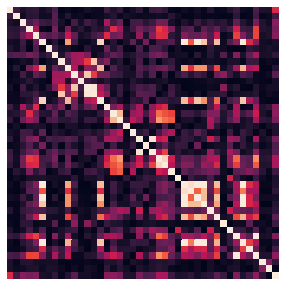

In [265]:
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(df_tm._get_numeric_data().corr().abs(), vmax=0.8, square=True, xticklabels=False, yticklabels=False, cbar=False)

#### To reduce the number of features more, I repeated the process again


In [266]:
numeric_X = df_tm._get_numeric_data().columns
cate_X = df_tm.columns.drop(numeric_X)
numeric_X = numeric_X.drop('price_doc')
cate_X = cate_X.drop('timestamp')

formula = smh.make_statsmodels_ols_formula(numeric_X, cate_X, 'price_doc', degree=1, scale=True)

result, selected_ivs = fs.by_f_test(df_tm, formula, 10)
result.summary()

0번째 골라내는 중...
0.615574719384 0.614428278923 38.7774735526
39 ['C(detention_facility_raion)', 'C(culture_objects_top_25)', 'C(railroad_1line)', 'C(big_market_raion)', 'C(ecology)', 'C(material)', 'scale(life_sq)', 'scale(floor)', 'scale(kitch_sq)', 'scale(hospital_beds_raion)', 'scale(healthcare_centers_raion)', 'scale(culture_objects_top_25_raion)', 'scale(build_count_block)', 'scale(build_count_frame)', 'scale(build_count_brick)', 'scale(build_count_monolith)', 'scale(build_count_foam)', 'scale(build_count_before_1920)', 'scale(build_count_19711995)', 'scale(green_zone_km)', 'scale(cemetery_km)', 'scale(railroad_station_avto_min)', 'scale(big_road1_km)', 'scale(railroad_km)', 'scale(university_km)', 'scale(office_km)', 'scale(church_synagogue_km)', 'scale(prom_part_500)', 'scale(office_sqm_500)', 'scale(cafe_count_500_price_4000)', 'scale(trc_count_1500)', 'scale(mosque_count_1500)', 'scale(prom_part_2000)', 'scale(market_count_3000)', 'scale(cafe_count_5000_price_high)', 'scale(mosqu

0.614739020624 0.613785672494 32.4865865396
38 ['C(detention_facility_raion)', 'C(culture_objects_top_25)', 'C(railroad_1line)', 'C(big_market_raion)', 'C(ecology)', 'C(material)', 'scale(life_sq)', 'scale(floor)', 'scale(kitch_sq)', 'scale(hospital_beds_raion)', 'scale(healthcare_centers_raion)', 'scale(culture_objects_top_25_raion)', 'scale(build_count_block)', 'scale(build_count_frame)', 'scale(build_count_brick)', 'scale(build_count_monolith)', 'scale(build_count_foam)', 'scale(build_count_19711995)', 'scale(green_zone_km)', 'scale(cemetery_km)', 'scale(railroad_station_avto_min)', 'scale(big_road1_km)', 'scale(railroad_km)', 'scale(university_km)', 'scale(office_km)', 'scale(church_synagogue_km)', 'scale(prom_part_500)', 'scale(office_sqm_500)', 'scale(cafe_count_500_price_4000)', 'scale(trc_count_1500)', 'scale(mosque_count_1500)', 'scale(prom_part_2000)', 'scale(market_count_3000)', 'scale(cafe_count_5000_price_high)', 'scale(mosque_count_5000)', 'scale(market_count_5000)', 'sca

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       scale(price_doc)   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     644.8
Date:                Tue, 28 Nov 2017   Prob (F-statistic):               0.00
Time:                        21:07:33   Log-Likelihood:                -16792.
No. Observations:               17826   AIC:                         3.367e+04
Df Residuals:                   17781   BIC:                         3.403e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.2290      0.026     -8.709      0.000      -0.281      -0.177
C(detention_facility_raion)[T.yes]      0.1248      0.023      5.518      0.000       0.080       0.169
C(culture_objects_top_25)[T.yes]        0.8896      0.039     22.948      0.000       0.814       0.966
C(railroad_1line)[T.yes]               -0.4949      0.030    -16.347      0.000      -0.554      -0.436
C(big_market_raion)[T.yes]             -0.1599      0.019     -8.417      0.000      -0.197      -0.123
C(ecology)[T.good]                      0.1034      0.026      3.901      0.000       0.051       0.155
C(ecology)[T.nodata]                   -0.4146      0.033    -12.672      0.000      -0.479      -0.350
C(ecology)[T.poor]                      0.1547      0.023      6.722      0.000       0.110       0.200
C(ecology)[T.satisfactory]              0.2932      0.029      9.951      0.000       0.235       0.351
C(material)[T.b]                        0.3643      0.014     26.550      0.000       0.337       0.391
C(material)[T.c]                        0.2684      0.021     12.708      0.000       0.227       0.310
C(material)[T.e]                        0.3284      0.022     14.597      0.000       0.284       0.372
C(material)[T.f]                        0.1085      0.024      4.480      0.000       0.061       0.156
scale(life_sq)                          0.4994      0.005    103.072      0.000       0.490       0.509
scale(floor)                            0.1163      0.005     23.488      0.000       0.107       0.126
scale(kitch_sq)                         0.1113      0.005     21.113      0.000       0.101       0.122
scale(hospital_beds_raion)              0.0240      0.006      4.022      0.000       0.012       0.036
scale(healthcare_centers_raion)         0.0445      0.006      6.927      0.000       0.032       0.057
scale(culture_objects_top_25_raion)    -0.5106      0.017    -30.125      0.000      -0.544      -0.477
scale(build_count_block)               -0.1077      0.007    -15.549      0.000      -0.121      -0.094
scale(build_count_frame)               -0.0540      0.006     -9.213      0.000      -0.065      -0.042
scale(build_count_brick)                0.0799      0.009      9.246      0.000       0.063       0.097
scale(build_count_monolith)             0.0496      0.007      7.531      0.000       0.037       0.063
scale(build_count_foam)                 0.0493      0.006      8.116      0.000       0.037       0.061
scale(build_count_19711995)            -0.0230      0.008     -3.000      0.003      -0.038      -0.008
scale(green_zone_km)                   -0.0702      0.005    -13.979      0.000      -0.080      -0.060
scale(cemetery_km)                     -0.0266      0.006     -4.13

In [267]:
anova = sm.stats.anova_lm(result, typ=2)
selected_ivs = smh.unwrap([iv[0] for iv in anova.iterrows() if iv[1][3] < 0.01])
len(selected_ivs)

38

In [269]:
df_tm[['timestamp'] + selected_ivs + ['price_doc']].to_csv('./preprocessed_input/train_macro.csv', index=False)
df_tm = pd.read_csv('./preprocessed_input/train_macro.csv', parse_dates=['timestamp'])
df_tm.shape, len(df_tm._get_numeric_data().columns) - 1

((17826, 40), 32)

In [270]:
num_X_cols = df_tm._get_numeric_data().columns.drop('price_doc')
df_tm_vif = vif.VarInflationFactor(impute=False, thresh=10.0).fit_transform(df_tm[num_X_cols])
print(df_tm_vif.shape)
df_tm_vif.tail()

VarInflationFactor fit
VarInflationFactor transform
(17826, 32)


life_sq  floor  kitch_sq  hospital_beds_raion  \
17821  29.000000   13.0      11.0          1145.000000   
17822  51.000000   19.0       1.0           192.000000   
17823  27.000000    7.0       6.0          1204.477469   
17824  21.953533   10.0       1.0           668.883388   
17825  28.000000    1.0       6.0          1015.000000   

       healthcare_centers_raion  culture_objects_top_25_raion  \
17821                         3                             0   
17822                         1                             0   
17823                         1                             0   
17824                         0                             0   
17825                         2                             0   

       build_count_block  build_count_frame  build_count_brick  \
17821          50.000000           1.000000          16.000000   
17822          58.000000           0.000000          61.000000   
17823          35.000000           0.000000          20.000000   
17824          34.095833          -0.844692          70.117587   
17825         108.000000           0.000000         105.000000   

       build_count_monolith  build_count_foam  build_count_19711995  \
17821              9.000000          0.000000             93.000000   
17822              0.000000          0.000000             30.000000   
17823              5.000000          0.000000            246.000000   
17824              2.015286         -0.011306             -6.961225   
17825              4.000000          0.000000             66.000000   

       green_zone_km  cemetery_km  railroad_station_avto_min  big_road1_km  \
17821       0.349807     3.837756                   7.553860      1.486707   
17822       0.143626     0.675383                   4.475919      1.908253   
17823       0.139814     1.933090                   5.300256      3.096057   
17824       0.427248     2.250137                   4.782323      2.808077   
17825       0.559699     1.791075                   3.604917      1.920884   

       railroad_km  university_km  office_km  church_synagogue_km  \
17821     2.233835       9.445872   1.491458             2.040548   
17822     0.356344       1.895763   0.969990             0.532268   
17823     1.137603       2.236806   1.103579             0.612359   
17824     1.727223      12.893684   4.338453             1.186621   
17825     0.734949       2.731394   2.108265             0.867332   

       prom_part_500  office_sqm_500  cafe_count_500_price_4000  \
17821           0.00               0                          0   
17822          11.67               0                          0   
17823           0.00               0                          0   
17824           3.70               0                          0   
17825           1.26               0                          0   

       trc_count_1500  mosque_count_1500  prom_part_2000  market_count_3000  \
17821               3                  0            4.01                  1   
17822               3                  0           16.93                  3   
17823               6                  0           18.89                  3   
17824               0                  0            3.12                  0   
17825               5                  0            1.35                  4   

       cafe_count_5000_price_high  mosque_count_5000  market_count_5000  \
17821                           0                  0                  6   
17822                           0                  1                  6   
17823                           0                  1                  6   
17824                           0                  0                  1   
17825                           0                  0                 10   

       gdp_quart_growth  net_capital_export  
17821              -2.8           -0.178296  
17822              -2.8           -0.178296  
17823              -2.8           -0.178296  
17824              -2.8           -0.178296  
17

In [271]:
cate_X_cols = list(set(df_tm.columns.drop(['price_doc', 'timestamp'])) - set(num_X_cols))
formula = smh.make_statsmodels_ols_formula(num_X_cols, cate_X_cols, 'price_doc', scale=True)
model = sm.OLS.from_formula(formula, data=df_tm)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       scale(price_doc)   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     644.8
Date:                Tue, 28 Nov 2017   Prob (F-statistic):               0.00
Time:                        21:10:29   Log-Likelihood:                -16792.
No. Observations:               17826   AIC:                         3.367e+04
Df Residuals:                   17781   BIC:                         3.403e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.2290      0.026     -8.709      0.000      -0.281      -0.177
C(detention_facility_raion)[T.yes]      0.1248      0.023      5.518      0.000       0.080       0.169
C(culture_objects_top_25)[T.yes]        0.8896      0.039     22.948      0.000       0.814       0.966
C(railroad_1line)[T.yes]               -0.4949      0.030    -16.347      0.000      -0.554      -0.436
C(big_market_raion)[T.yes]             -0.1599      0.019     -8.417      0.000      -0.197      -0.123
C(ecology)[T.good]                      0.1034      0.026      3.901      0.000       0.051       0.155
C(ecology)[T.nodata]                   -0.4146      0.033    -12.672      0.000      -0.479      -0.350
C(ecology)[T.poor]                      0.1547      0.023      6.722      0.000       0.110       0.200
C(ecology)[T.satisfactory]              0.2932      0.029      9.951      0.000       0.235       0.351
C(material)[T.b]                        0.3643      0.014     26.550      0.000       0.337       0.391
C(material)[T.c]                        0.2684      0.021     12.708      0.000       0.227       0.310
C(material)[T.e]                        0.3284      0.022     14.597      0.000       0.284       0.372
C(material)[T.f]                        0.1085      0.024      4.480      0.000       0.061       0.156
scale(life_sq)                          0.4994      0.005    103.072      0.000       0.490       0.509
scale(floor)                            0.1163      0.005     23.488      0.000       0.107       0.126
scale(kitch_sq)                         0.1113      0.005     21.113      0.000       0.101       0.122
scale(hospital_beds_raion)              0.0240      0.006      4.022      0.000       0.012       0.036
scale(healthcare_centers_raion)         0.0445      0.006      6.927      0.000       0.032       0.057
scale(culture_objects_top_25_raion)    -0.5106      0.017    -30.125      0.000      -0.544      -0.477
scale(build_count_block)               -0.1077      0.007    -15.549      0.000      -0.121      -0.094
scale(build_count_frame)               -0.0540      0.006     -9.213      0.000      -0.065      -0.042
scale(build_count_brick)                0.0799      0.009      9.246      0.000       0.063       0.097
scale(build_count_monolith)             0.0496      0.007      7.531      0.000       0.037       0.063
scale(build_count_foam)                 0.0493      0.006      8.116      0.000       0.037       0.061
scale(build_count_19711995)            -0.0230      0.008     -3.000      0.003      -0.038      -0.008
scale(green_zone_km)                   -0.0702      0.005    -13.979      0.000      -0.080      -0.060
scale(cemetery_km)                     -0.0266      0.006     -4.13

#### 차원을 더 줄일 수 있을까 하여, Lasso regulazation을 시도 해보았다. 

In [360]:
result_lasso = model.fit_regularized(alpha=0.01, L1_wt=1)
result_lasso.summary()

In [363]:
col_by_lasso = [] 
for i in range(len(result_lasso.params)):
    if result_lasso.params[i] != 0 :
        col_by_lasso.append(result_lasso.params.index[i])
    else :
        print(result_lasso.params.index[i],  result_lasso.params[i])
len(col_by_lasso)

Intercept 0.0
C(detention_facility_raion)[T.yes] 0.0
C(culture_objects_top_25)[T.yes] 0.0
C(ecology)[T.good] 0.0
C(ecology)[T.poor] 0.0
C(material)[T.f] 0.0
scale(build_count_19711995) 0.0
scale(cemetery_km) 0.0
scale(railroad_km) 0.0
scale(church_synagogue_km) 0.0
scale(market_count_3000) 0.0
scale(market_count_5000) 0.0
scale(net_capital_export) 0.0


32

In [383]:
ori = re.sub("C\(", '', col_by_lasso[0])
ori = re.sub("scale\(", '', col_by_lasso[0])
ori = re.sub("\)", '', col_by_lasso[0])
ori = re.sub("\[.*\]", '', col_by_lasso[0])

ori

'C(railroad_1line)'

In [385]:
import re
temp_cols = [] 
for col in col_by_lasso:
    ori = re.sub("C\(", '', col)
    ori = re.sub("scale\(", '', ori)
    ori = re.sub("\)", '', ori)
    ori = re.sub("\[.*\]", '', ori)
    temp_cols.append(ori)
temp_cols
del col_by_lasso

In [389]:
num_X = df_tm[temp_cols]._get_numeric_data().columns.values.tolist()
cate_X = list(set(temp_cols) - set(num_X))
formula = smh.make_statsmodels_ols_formula(num_X, cate_X, 'np.log(price_doc)', scale=True)

In [390]:
model = sm.OLS.from_formula(formula, data=df_tm)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     scale(np.log(price_doc))   R-squared:                       0.567
Model:                                  OLS   Adj. R-squared:                  0.566
Method:                       Least Squares   F-statistic:                     665.0
Date:                      Wed, 29 Nov 2017   Prob (F-statistic):               0.00
Time:                              09:45:57   Log-Likelihood:                -17838.
No. Observations:                     17826   AIC:                         3.575e+04
Df Residuals:                         17790   BIC:                         3.603e+04
Df Model:                                35                                         
Covariance Type:                  nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.0306      0.022      1.424      0.154      -0.012       0.073
C(ecology)[T.good]                     -0.1394      0.022     -6.223      0.000      -0.183      -0.095
C(ecology)[T.nodata]                   -0.6238      0.027    -23.484      0.000      -0.676      -0.572
C(ecology)[T.poor]                     -0.0413      0.021     -1.943      0.052      -0.083       0.000
C(ecology)[T.satisfactory]              0.0242      0.026      0.941      0.347      -0.026       0.075
C(material)[T.b]                        0.3643      0.014     25.918      0.000       0.337       0.392
C(material)[T.c]                        0.2093      0.022      9.452      0.000       0.166       0.253
C(material)[T.e]                        0.2921      0.023     12.442      0.000       0.246       0.338
C(material)[T.f]                        0.1550      0.025      6.091      0.000       0.105       0.205
C(railroad_1line)[T.yes]               -0.5686      0.031    -18.214      0.000      -0.630      -0.507
C(big_market_raion)[T.yes]             -0.1426      0.019     -7.390      0.000      -0.180      -0.105
scale(life_sq)                          0.4565      0.005     89.095      0.000       0.446       0.467
scale(floor)                            0.1053      0.005     20.245      0.000       0.095       0.115
scale(kitch_sq)                         0.0957      0.005     17.412      0.000       0.085       0.106
scale(hospital_beds_raion)              0.0153      0.006      2.495      0.013       0.003       0.027
scale(healthcare_centers_raion)         0.0422      0.007      6.494      0.000       0.029       0.055
scale(culture_objects_top_25_raion)    -0.2625      0.015    -17.877      0.000      -0.291      -0.234
scale(build_count_block)               -0.0759      0.007    -10.733      0.000      -0.090      -0.062
scale(build_count_frame)               -0.0641      0.006    -10.693      0.000      -0.076      -0.052
scale(build_count_brick)                0.0567      0.009      6.445      0.000       0.039       0.074
scale(build_count_monolith)             0.0599      0.007      8.732      0.000       0.046       0.073
scale(build_count_foam)                 0.0495      0.006      8.337      0.000       0.038       0.061
scale(green_zone_km)                   -0.0655      0.005    -12.526      0.000      -0.076      -0.055
scale(railroad_station_avto_min)       -0.1178      0.006    -18.704      0.000      -0.130      -0.105
scale(big_road1_km)                    -0.0515      0.006     -8.529      0.000      -0.063      -0.040
scale(university_km)                   -0.1763      0.009    -18.692      0.000      -0.195      -0.158
s

In [391]:
anova = sm.stats.anova_lm(result, typ=2)
selected_ivs = smh.unwrap([iv[0] for iv in anova.iterrows() if iv[1][3] < 0.01])
len(selected_ivs)

28

In [64]:
selected_ivs

['ecology',
 'material',
 'railroad_1line',
 'big_market_raion',
 'life_sq',
 'floor',
 'kitch_sq',
 'healthcare_centers_raion',
 'culture_objects_top_25_raion',
 'build_count_block',
 'build_count_frame',
 'build_count_brick',
 'build_count_monolith',
 'build_count_foam',
 'green_zone_km',
 'railroad_station_avto_min',
 'big_road1_km',
 'university_km',
 'office_km',
 'prom_part_500',
 'office_sqm_500',
 'cafe_count_500_price_4000',
 'trc_count_1500',
 'mosque_count_1500',
 'prom_part_2000',
 'cafe_count_5000_price_high',
 'mosque_count_5000',
 'gdp_quart_growth']

In [51]:
df_tm[['timestamp'] + selected_ivs + ['price_doc']].to_csv('preprocessed_input/train_macro.csv', index=False)
df_tm = pd.read_csv('preprocessed_input/train_macro.csv', parse_dates=['timestamp'])
df_tm.shape, len(df_tm._get_numeric_data().columns) - 1

((21570, 30), 24)

In [52]:
num_X = df_tm._get_numeric_data().columns.drop('price_doc')
num_X


Index(['life_sq', 'floor', 'kitch_sq', 'healthcare_centers_raion',
       'culture_objects_top_25_raion', 'build_count_block',
       'build_count_frame', 'build_count_brick', 'build_count_monolith',
       'build_count_foam', 'green_zone_km', 'railroad_station_avto_min',
       'big_road1_km', 'university_km', 'office_km', 'prom_part_500',
       'office_sqm_500', 'cafe_count_500_price_4000', 'trc_count_1500',
       'mosque_count_1500', 'prom_part_2000', 'cafe_count_5000_price_high',
       'mosque_count_5000', 'gdp_quart_growth'],
      dtype='object')

In [59]:
num_X = df_tm._get_numeric_data().columns.drop('price_doc', 'timestamp')
cate_X = list(set(df_tm.columns.drop(['price_doc', 'timestamp'])) - set(num_X))
formula = smh.make_statsmodels_ols_formula(num_X, cate_X, 'np.log(price_doc)', degree=2, scale=True)


In [60]:
formula

'scale(np.log(price_doc)) ~ C(big_market_raion) + C(railroad_1line) + C(material) + C(ecology) + scale(life_sq) + scale(floor) + scale(kitch_sq) + scale(healthcare_centers_raion) + scale(culture_objects_top_25_raion) + scale(build_count_block) + scale(build_count_frame) + scale(build_count_brick) + scale(build_count_monolith) + scale(build_count_foam) + scale(green_zone_km) + scale(railroad_station_avto_min) + scale(big_road1_km) + scale(university_km) + scale(office_km) + scale(prom_part_500) + scale(office_sqm_500) + scale(cafe_count_500_price_4000) + scale(trc_count_1500) + scale(mosque_count_1500) + scale(prom_part_2000) + scale(cafe_count_5000_price_high) + scale(mosque_count_5000) + scale(gdp_quart_growth) + scale(I(life_sq**2)) + scale(I(floor**2)) + scale(I(kitch_sq**2)) + scale(I(healthcare_centers_raion**2)) + scale(I(culture_objects_top_25_raion**2)) + scale(I(build_count_block**2)) + scale(I(build_count_frame**2)) + scale(I(build_count_brick**2)) + scale(I(build_count_monol

In [61]:
model = sm.OLS.from_formula(formula, data=df_tm)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     scale(np.log(price_doc))   R-squared:                       0.736
Model:                                  OLS   Adj. R-squared:                  0.735
Method:                       Least Squares   F-statistic:                     877.8
Date:                      Wed, 29 Nov 2017   Prob (F-statistic):               0.00
Time:                              11:19:08   Log-Likelihood:                -13535.
No. Observations:                     17984   AIC:                         2.719e+04
Df Residuals:                         17926   BIC:                         2.764e+04
Df Model:                                57                                         
Covariance Type:                  nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                      -0.0517      0.018     -2.821      0.005      -0.088      -0.016
C(big_market_raion)[T.yes]                     -0.1745      0.017    -10.447      0.000      -0.207      -0.142
C(railroad_1line)[T.yes]                       -0.6057      0.026    -23.622      0.000      -0.656      -0.555
C(material)[T.b]                                0.3370      0.013     26.280      0.000       0.312       0.362
C(material)[T.c]                                0.2856      0.018     15.865      0.000       0.250       0.321
C(material)[T.e]                                0.2371      0.020     11.688      0.000       0.197       0.277
C(material)[T.f]                                0.1527      0.021      7.334      0.000       0.112       0.194
C(ecology)[T.good]                             -0.0643      0.019     -3.379      0.001      -0.102      -0.027
C(ecology)[T.nodata]                           -0.4844      0.023    -21.037      0.000      -0.530      -0.439
C(ecology)[T.poor]                              0.0247      0.017      1.434      0.152      -0.009       0.058
C(ecology)[T.satisfactory]                      0.1294      0.022      5.947      0.000       0.087       0.172
scale(life_sq)                                  0.8759      0.012     75.748      0.000       0.853       0.899
scale(floor)                                    0.2072      0.013     16.164      0.000       0.182       0.232
scale(kitch_sq)                                -0.0358      0.013     -2.701      0.007      -0.062      -0.010
scale(healthcare_centers_raion)                 0.0584      0.014      4.122      0.000       0.031       0.086
scale(culture_objects_top_25_raion)             0.4587      0.032     14.272      0.000       0.396       0.522
scale(build_count_block)                       -0.0571      0.015     -3.754      0.000      -0.087      -0.027
scale(build_count_frame)                        0.0558      0.019      2.933      0.003       0.019       0.093
scale(build_count_brick)                        0.1562      0.014     11.214      0.000       0.129       0.184
scale(build_count_monolith)                     0.0167      0.015      1.137      0.256      -0.012       0.046
scale(build_count_foam)                        -0.0864      0.025     -3.421      0.001      -0.136      -0.037
scale(green_zone_km)                           -0.0267      0.010     -2.600      0.009      -0.047      -0.007
scale(railroad_station_avto_min)               -0.0106      0.013     -0.833      0.405      -0.035       0.014
scale(big_road1_km)                            -0.0210      0.015     -1.405      0.160      -0.050      

In [125]:
result = model.fit_regularized(L1_wt=1, alpha=0.1)
final = sm.regression.linear_model.OLSResults(model,
                                              result.params,
                                              model.normalized_cov_params)
final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     scale(np.log(price_doc))   R-squared:                       0.510
Model:                                  OLS   Adj. R-squared:                  0.508
Method:                       Least Squares   F-statistic:                     327.0
Date:                      Wed, 29 Nov 2017   Prob (F-statistic):               0.00
Time:                              11:45:54   Log-Likelihood:                -19108.
No. Observations:                     17984   AIC:                         3.833e+04
Df Residuals:                         17926   BIC:                         3.878e+04
Df Model:                                57                                         
Covariance Type:                  nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                            0      0.025          0      1.000      -0.049       0.049
C(big_market_raion)[T.yes]                           0      0.023          0      1.000      -0.045       0.045
C(railroad_1line)[T.yes]                             0      0.035          0      1.000      -0.069       0.069
C(material)[T.b]                                     0      0.017          0      1.000      -0.034       0.034
C(material)[T.c]                                     0      0.025          0      1.000      -0.048       0.048
C(material)[T.e]                                     0      0.028          0      1.000      -0.054       0.054
C(material)[T.f]                                     0      0.028          0      1.000      -0.056       0.056
C(ecology)[T.good]                                   0      0.026          0      1.000      -0.051       0.051
C(ecology)[T.nodata]                                 0      0.031          0      1.000      -0.062       0.062
C(ecology)[T.poor]                                   0      0.023          0      1.000      -0.046       0.046
C(ecology)[T.satisfactory]                           0      0.030          0      1.000      -0.058       0.058
scale(life_sq)                                  0.3858      0.016     24.472      0.000       0.355       0.417
scale(floor)                                         0      0.017          0      1.000      -0.034       0.034
scale(kitch_sq)                                 0.1400      0.018      7.737      0.000       0.105       0.175
scale(healthcare_centers_raion)                 0.0376      0.019      1.946      0.052      -0.000       0.076
scale(culture_objects_top_25_raion)                  0      0.044          0      1.000      -0.086       0.086
scale(build_count_block)                             0      0.021          0      1.000      -0.041       0.041
scale(build_count_frame)                             0      0.026          0      1.000      -0.051       0.051
scale(build_count_brick)                             0      0.019          0      1.000      -0.037       0.037
scale(build_count_monolith)                     0.0402      0.020      2.006      0.045       0.001       0.079
scale(build_count_foam)                              0      0.034          0      1.000      -0.067       0.067
scale(green_zone_km)                                 0      0.014          0      1.000      -0.027       0.027
scale(railroad_station_avto_min)               -0.0973      0.017     -5.624      0.000      -0.131      -0.063
scale(big_road1_km)                            -0.0115      0.020     -0.563      0.573      -0.051      

In [126]:
df_testm.material = df_testm.material.replace('d', 'e')

In [128]:
pred = final.predict(df_testm[selected_ivs])

In [129]:
pred = (np.exp(pred) * np.sqrt(np.var(df_tm.price_doc))) + np.mean(df_tm.price_doc)

In [130]:
# sns.distplot(pred)
# plt.show()

In [131]:
submission = pd.DataFrame(pred)

In [132]:
submission = submission.reset_index()


In [133]:
submission.columns = ['id', 'price_doc']

submission.id = list(range(30474, 38136))
submission.head()

id     price_doc
0  30474  9.117741e+06
1  30475  9.717913e+06
2  30476  1.004323e+07
3  30477  8.949499e+06
4  30478  9.289938e+06

In [134]:
submission.to_csv("submission.csv", index=False)

#### Conclusion 

 - 최종 결과 
 ![Kaggle](Screen Shot 2017-11-29 at 14.49.28.png)
 ![Rank](Screen Shot 2017-11-29 at 14.50.07.png)
 
 >  **The lesson I have learnt from the first data analysing project is hardship of processing data before buliding a model. Till the due date, I could not make the score better than this(the rank of my score is even nearer to the bottom than the top.). I got many errors and critical issues such as dimension related problem, data vanishing and etc. I have failed thousands times for about two weeks and the final result is not successful too. But, I learned that preprocessing is much more important than what models am I going to use and writing good code, which means that memory issues are considered, available to be restarted and perfectly producing the same result as I expect, plays crucial role on processing any projects. After I learn handling time_series data and boosting model, I am planning to apply them to this challenge **